In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math

In [2]:
anime = pd.read_csv("data/anime.csv")
anime.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [3]:
#Clean studios column from "list of strings" to a string
anime['studios'] = anime['studios'].str.replace("[", "")
anime['studios'] = anime['studios'].str.replace("]", "")
anime['studios'] = anime['studios'].str.lstrip("'").str.rstrip("'")
#final_username = username.replace("_", "")


In [4]:
#Clean list function
def clean_list(col):
    col = col.str.replace("[", "")
    col = col.str.replace("]", "")
    col = col.str.replace("'", "")
    col = col.str.split(",")
    return col

anime['tags'] = clean_list(anime['tags'])
anime['contentWarn'] = clean_list(anime['contentWarn'])



# anime['tags'] = anime['tags'].str.replace("[", "")
# anime['tags'] = anime['tags'].str.replace("]", "")
# anime['tags'] = anime['tags'].str.replace("'", "")
# anime['tags'] = anime['tags'].str.split(",")

In [5]:
#Strip off the space in front of each word/phrase in a column with a list. 
def leftstrip(li):
    newList = []
    for word in li:
        word = word.strip()
        newList.append(word)
#         print(word)
    return newList


        
anime['tags'] = anime['tags'].apply(lambda x: leftstrip(x))
anime['contentWarn'] = anime['contentWarn'].apply(lambda x: leftstrip(x))        

In [6]:
#Change year to int instead of double to remove decimal
anime["startYr"] = anime["startYr"].fillna(0.0).astype(int)
anime["finishYr"] = anime["finishYr"].fillna(0.0).astype(int)
anime.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,Bones,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse, Mature Themes, Violence, Domest...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016,2016,NaN,Mitsuha and Taki are two total strangers livin...,CoMix Wave Films,"[Drama, Romance, Body Swapping, Gender Bender,...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016,2016,NaN,"After transferring into a new school, a deaf g...",Kyoto Animation,"[Drama, Shounen, Disability, Melancholy, Menta...","[Bullying, Mature Themes, Suicide]",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016,2016,Fall,"Picking up where the second season ended, the ...",Production I.G,"[Shounen, Sports, Animeism, School Club, Schoo...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,Wit Studio,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism, Explicit Violence]",21308.0,3217,7864,174,4.650,15789.0


In [7]:
#Sort the list by rating
anime.sort_values(['rating'], ascending=False)

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,Bones,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse, Mature Themes, Violence, Domest...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016,2016,NaN,Mitsuha and Taki are two total strangers livin...,CoMix Wave Films,"[Drama, Romance, Body Swapping, Gender Bender,...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016,2016,NaN,"After transferring into a new school, a deaf g...",Kyoto Animation,"[Drama, Shounen, Disability, Melancholy, Menta...","[Bullying, Mature Themes, Suicide]",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016,2016,Fall,"Picking up where the second season ended, the ...",Production I.G,"[Shounen, Sports, Animeism, School Club, Schoo...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,Wit Studio,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism, Explicit Violence]",21308.0,3217,7864,174,4.650,15789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,"Welcome to Demon School, Iruma-kun 2",TV,NaN,NaN,False,2021,2021,NaN,"Second Season of Welcome to Demon School, Irum...",,"[Comedy, Shounen, Demons, Monster School, Pers...",[],0.0,0,1106,0,NaN,NaN
14574,Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai,Music Video,1.0,4.0,False,2020,2020,NaN,NaN,,"[Chibi, Vocaloid]",[],9.0,1,7,1,NaN,NaN
14575,Minagoroshi,OVA,1.0,1.0,False,2005,2005,NaN,NaN,,"[Comedy, Ecchi, No Dialogue, Shorts]",[],3.0,0,7,0,NaN,NaN
14576,Kurayukaba,Movie,NaN,NaN,False,0,0,NaN,NaN,Makaria,[],[],0.0,0,62,0,NaN,NaN


In [8]:
anime['mediaType'].value_counts()

TV             4510
Movie          2512
OVA            2097
Music Video    1596
Web            1555
DVD Special     849
Other           782
TV Special      609
Name: mediaType, dtype: int64

In [9]:
#Create different dataframes depending on their type. Created only three most popular
tv_anime = anime.loc[anime['mediaType'] == 'TV'].sort_values('rating', ascending=False)
movie_anime = anime.loc[anime['mediaType'] == 'Movie'].sort_values('rating', ascending=False)
ova_anime = anime.loc[anime['mediaType'] == 'OVA'].sort_values('rating', ascending=False)

In [10]:
tv_anime['sznOfRelease'].value_counts()

Spring    1099
Fall       957
Winter     665
Summer     630
Name: sznOfRelease, dtype: int64

In [11]:
tv_anime['sznOfRelease'].head(100).value_counts()

Spring    31
Fall      30
Winter    23
Summer    16
Name: sznOfRelease, dtype: int64

### Generate recommended list of animes by genre and anime type

In [12]:
# count = 0
# for index, col in tv_anime['tags'].iteritems():
#     if 'Action' in col:
#         print(col)
#         print()
#         count +=1
# count    

#Create a function that can count the number per genre and get the indeces that contain that specific tag
def genreIndex(genre, df):
    count = 0
    indeces = []
    for index, col in df['tags'].iteritems():
        if genre in col:
            indeces.append(index)
#             print(col)
#             print()
            count+=1
    #print("There are " + str(count) + " animes that are " + genre)
    return indeces

#Can get total count by getting len(genreIndex)

In [13]:
#Ask for user input
genreChoice = input('Enter a genre of your choice: ')
dfInput = input('Select anime type: TV, Movie, OVA ')

#Create dictionary that will point to the specific dataframe based on type
args = {'TV': tv_anime, 'Movie': movie_anime, 'OVA': ova_anime}
dfChoice = args[dfInput]

# genreIndex(genreChoice, dfChoice)

def animeList(genre, df):
    #List comprehension to extract anime info of those within select genre
    animeTitle = [anime.iloc[index].title for index in genreIndex(genre, df)]
    animeDesc = [anime.iloc[index].description for index in genreIndex(genre, df)]
    animeRating = [anime.iloc[index].rating for index in genreIndex(genre, df)]
    anime_results = pd.DataFrame({'Title': animeTitle, 'Description': animeDesc, 'Rating': animeRating})
    anime_results.sort_values('Rating', ascending=False, inplace=True)
    #Reset index so show better ranking according to rating
    anime_results.index += 1
    return anime_results.head(100)

#Run function to return a dataframe of top 100 animes based on genre and type        
animeList(genreChoice, dfChoice)

Enter a genre of your choice: Drama
Select anime type: TV, Movie, OVA TV


,Title,Description,Rating
1,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,4.702
2,Demon Slayer: Kimetsu no Yaiba,"Bloodthirsty demons lurk in the woods, and nob...",4.647
3,Hunter x Hunter (2011),"Drawn to the mystique of the unknown, Hunters ...",4.635
4,Gintama (2015),Fourth season of Gintama.,4.622
5,Kaguya-sama: Love Is War?,The battle between love and pride continues! N...,4.617
...,...,...,...
96,Initial D Fifth Stage,Still working as part of the Project D driving...,4.347
97,My Teen Romantic Comedy SNAFU TOO!,"Hikigaya Hachiman, with his unique thought pro...",4.345
98,Astra Lost in Space,"Itʼs the first day of Planet Camp, and Aries S...",4.344
99,Welcome to the Ballroom,Feckless high school student Tatara Fujita wan...,4.342


### Generate numerical summary based on genres

In [14]:
#Get all the unique genres and the number of animes per genre
genres = []
genreTotal = {}
for index, col in tv_anime['tags'].iteritems():
    for genre in col:
        if (genre not in genres):
            genres.append(genre)
            genreTotal[genre] = 1

        genreTotal[genre] += 1           

In [15]:
print('There are ' + str(len(genres)) + ' total unique genres.')

There are 473 total unique genres.


In [16]:
#Get the top 20 genres and the total count of anime tv shows
genre_df = pd.DataFrame(list(genreTotal.items()), columns=['Genre', 'Count'])
top20 = genre_df.sort_values('Count', ascending=False).head(20)
top20.reset_index(drop=True, inplace=True)
top20

,Genre,Count
0,Comedy,1669
1,Based on a Manga,1655
2,Action,1297
3,Fantasy,968
4,Sci Fi,872
5,Shounen,785
6,Original Work,730
7,Short Episodes,724
8,Family Friendly,706
9,School Life,699


In [17]:
#Find average rating per genre
#Note: totalAnime is only for those with a score. Does not include the animes w/ no score
def averagePerGenre(df, genre):
    averageScore = 0
    totalScore = 0
    totalAnime = 0
    for index, data in df.iterrows():
        if (genre in data['tags']) & (math.isnan(data['rating']) == False):
            #print(data['rating'])
            totalScore += float(data['rating'])
            totalAnime += 1
#     print(genre)
#     print("Total Score " + str(totalScore))
#     print("Total Anime " + str(totalAnime))
#     print("Average Score " + str(totalScore/totalAnime))
#     print()
    return (totalScore/totalAnime)


top20['Average_Score'] = top20['Genre'].apply(lambda x: averagePerGenre(tv_anime, x))
top20.sort_values('Average_Score', ascending=False, inplace=True)


In [18]:
#Find average rating per genre
#Note: totalAnime is only for those with a score. Does not include the animes w/ no score
def averagePerGenre(df, genre):
    averageScore = 0
    totalScore = 0
    totalAnime = 0
    for index, data in df.iterrows():
        if (genre in data['tags']) & (math.isnan(data['rating']) == False):
            #print(data['rating'])
            totalScore += float(data['rating'])
            totalAnime += 1
#     print(genre)
#     print("Total Score " + str(totalScore))
#     print("Total Anime " + str(totalAnime))
#     print("Average Score " + str(totalScore/totalAnime))
#     print()
    return (totalScore/totalAnime)


top20['Average_Score'] = top20['Genre'].apply(lambda x: averagePerGenre(tv_anime, x))
top20.sort_values('Average_Score', ascending=False, inplace=True)


In [19]:
top20.reset_index(drop=True, inplace=True)
top20.index += 1
top20

,Genre,Count,Average_Score
1,Drama,636,3.708162
2,Based on a Light Novel,371,3.687985
3,Seinen,479,3.572967
4,Romance,545,3.540822
5,Shounen,785,3.526268
6,Supernatural,398,3.516712
7,School Life,699,3.475290
8,Based on a Manga,1655,3.469324
9,Action,1297,3.340964
10,Magic,407,3.337748


In [20]:
#Find average rating per genre
#Note: totalAnime is only for those with a score. Does not include the animes w/ no score
def averageEpPerGenre(df, genre):
    totalEp = 0
    totalAnime = 0
    for index, data in df.iterrows():
        if (genre in data['tags']) & (math.isnan(data['eps']) == False):
            #print(data['rating'])
            totalEp += float(data['eps'])
            totalAnime += 1
#     print(genre)
#     print("Total Score " + str(totalScore))
#     print("Total Anime " + str(totalAnime))
#     print("Average Score " + str(totalScore/totalAnime))
#     print()
    return (totalEp/totalAnime)


top20['Average_Num_Eps'] = top20['Genre'].apply(lambda x: averageEpPerGenre(tv_anime, x))
top20



,Genre,Count,Average_Score,Average_Num_Eps
1,Drama,636,3.708162,25.834697
2,Based on a Light Novel,371,3.687985,15.218563
3,Seinen,479,3.572967,18.015284
4,Romance,545,3.540822,20.812977
5,Shounen,785,3.526268,45.893048
6,Supernatural,398,3.516712,28.720317
7,School Life,699,3.475290,22.527246
8,Based on a Manga,1655,3.469324,38.088806
9,Action,1297,3.340964,30.492742
10,Magic,407,3.337748,26.687664


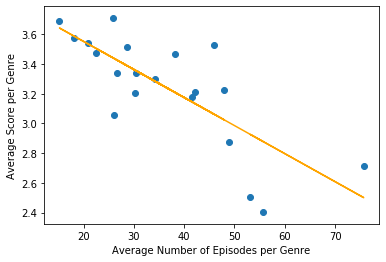

In [27]:
plt.scatter(top20['Average_Num_Eps'], top20['Average_Score'])
m, b = np.polyfit(top20['Average_Num_Eps'], top20['Average_Score'], 1)
plt.plot(top20['Average_Num_Eps'], m*top20['Average_Num_Eps'] + b, color="orange")
plt.xlabel("Average Number of Episodes per Genre")
plt.ylabel("Average Score per Genre")
plt.show()


In [34]:
anime

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009,2010,Spring,The foundation of alchemy is based on the law ...,Bones,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse, Mature Themes, Violence, Domest...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016,2016,NaN,Mitsuha and Taki are two total strangers livin...,CoMix Wave Films,"[Drama, Romance, Body Swapping, Gender Bender,...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016,2016,NaN,"After transferring into a new school, a deaf g...",Kyoto Animation,"[Drama, Shounen, Disability, Melancholy, Menta...","[Bullying, Mature Themes, Suicide]",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016,2016,Fall,"Picking up where the second season ended, the ...",Production I.G,"[Shounen, Sports, Animeism, School Club, Schoo...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019,2019,Spring,The battle to retake Wall Maria begins now! Wi...,Wit Studio,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism, Explicit Violence]",21308.0,3217,7864,174,4.650,15789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,"Welcome to Demon School, Iruma-kun 2",TV,NaN,NaN,False,2021,2021,NaN,"Second Season of Welcome to Demon School, Irum...",,"[Comedy, Shounen, Demons, Monster School, Pers...",[],0.0,0,1106,0,NaN,NaN
14574,Pinocchio-P: Sekai wa Mada Hajimatte Sura Inai,Music Video,1.0,4.0,False,2020,2020,NaN,NaN,,"[Chibi, Vocaloid]",[],9.0,1,7,1,NaN,NaN
14575,Minagoroshi,OVA,1.0,1.0,False,2005,2005,NaN,NaN,,"[Comedy, Ecchi, No Dialogue, Shorts]",[],3.0,0,7,0,NaN,NaN
14576,Kurayukaba,Movie,NaN,NaN,False,0,0,NaN,NaN,Makaria,[],[],0.0,0,62,0,NaN,NaN


In [61]:
for a in anime.itertuples():
    if 'Shoujo' in a.tags:
         print(a.title)

shoujoTitles = [a.title for a in anime.itertuples() if 'Shoujo' in a.tags]
    

Natsume's Book of Friends Season 6
Natsume's Book of Friends Season 4
Natsume's Book of Friends Season 5
Natsume's Book of Friends Season 3
Fruits Basket 2nd Season
Hotarubi no Mori e
Yona of the Dawn: Zeno Arc
Natsume's Book of Friends Season 2
Natsume's Book of Friends Movie: Ephemeral Bond
Kamisama Kiss: Kako-hen
Natsume's Book of Friends Season 6 Specials
Fruits Basket 1st Season
Natsume's Book of Friends Season 5 Specials
Attack on Titan: No Regrets
Kamisama Kiss 2nd Season
Natsume Yuujinchou: Itsuka Yuki no Hi ni
Ouran High School Host Club
Snow White with the Red Hair 2nd Season
Kamisama Kiss: Kamisama, Shiawase ni Naru
Yona of the Dawn
Maid-sama!
Skip Beat!
Natsume's Book of Friends
Banana Fish
Whisper of the Heart
Kamisama Kiss
Nana
Blue Spring Ride: Page.13
Kimi ni Todoke - From Me To You 2nd Season
Kimi ni Todoke - From Me To You
My Love Story!!
Snow White with the Red Hair
Kamisama Kiss OVA
School Babysitters
My Roommate is a Cat
From Up On Poppy Hill
Snow White with the Re

In [62]:
shoujoTitles

["Natsume's Book of Friends Season 6",
 "Natsume's Book of Friends Season 4",
 "Natsume's Book of Friends Season 5",
 "Natsume's Book of Friends Season 3",
 'Fruits Basket 2nd Season',
 'Hotarubi no Mori e',
 'Yona of the Dawn: Zeno Arc',
 "Natsume's Book of Friends Season 2",
 "Natsume's Book of Friends Movie: Ephemeral Bond",
 'Kamisama Kiss: Kako-hen',
 "Natsume's Book of Friends Season 6 Specials",
 'Fruits Basket 1st Season',
 "Natsume's Book of Friends Season 5 Specials",
 'Attack on Titan: No Regrets',
 'Kamisama Kiss 2nd Season',
 'Natsume Yuujinchou: Itsuka Yuki no Hi ni',
 'Ouran High School Host Club',
 'Snow White with the Red Hair 2nd Season',
 'Kamisama Kiss: Kamisama, Shiawase ni Naru',
 'Yona of the Dawn',
 'Maid-sama!',
 'Skip Beat!',
 "Natsume's Book of Friends",
 'Banana Fish',
 'Whisper of the Heart',
 'Kamisama Kiss',
 'Nana',
 'Blue Spring Ride: Page.13',
 'Kimi ni Todoke - From Me To You 2nd Season',
 'Kimi ni Todoke - From Me To You',
 'My Love Story!!',
 'Snow 